In the following, we investigate the role of the metric in distinguishing between measure preserving automorphisms of the unit cube.

In [1]:
import numpy as np
from jax.scipy import special

In [2]:
from plotting import cart2pol, scatterplot_variables

In [3]:
# Implement the construction in section 2.2 of Aapo's paper
# Implement the construction in Francesco's paper, maybe based on appendix D.1 in Ilyes' paper;

def build_automorphism(A):
    '''
    Takes an orthogonal matrix A, returns a measure preserving automorphism
    On the unit square (cube?) and its inverse
    '''
    def measure_preserving(z):
        # apply inverse cdf transform
        z_gauss = special.erfinv(2*z - 1.0)
        # apply rotation
        z_gauss = A @ z_gauss
        # apply cdf transform
        z_modified = 0.5*(1.0 + special.erf(z_gauss))
        return z_modified
    
    A_inv = np.linalg.inv(A) 
    
    def measure_preserving_inv(z):
        # apply cdf transform
        z_gauss = special.erfinv(2*z - 1.0)
        # apply (inverse) rotation
        z_gauss = A_inv @ z_gauss
        # apply inverse cdf transform
        z_modified = 0.5*(1.0 + special.erf(z_gauss))
        return z_modified
    
    return measure_preserving, measure_preserving_inv

In [4]:
import jax
from jax import numpy as np
from jax import vmap
from jax import jacfwd

from jax import random
key = random.PRNGKey(42)

import numpy as onp

from metrics import aDM

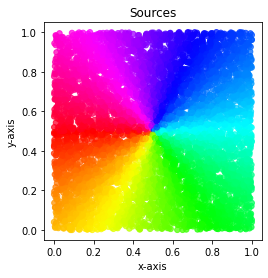

In [5]:
# N:=Number of samples
N = 6000
# D:=Number of dimensions
D = 2


# Generate the samples
S = random.uniform(key, shape=(N, D), minval=0.0, maxval=1.0)

_, phi = cart2pol( S[:,0]-0.5, S[:,1]-0.5)

colors = phi

scatterplot_variables(S, 'Sources', colors=colors)

In [6]:
key+=1

In [7]:
from scipy.stats import ortho_group # Requires version 0.18 of scipy

A = ortho_group.rvs(dim=2)

f, g = build_automorphism(A)

In [8]:
f_batched = vmap(f)
X = f_batched(S)

In [9]:
X

DeviceArray([[0.5122436 , 0.8861847 ],
             [0.04500425, 0.17567685],
             [0.37325603, 0.26697627],
             ...,
             [0.54887164, 0.7678211 ],
             [0.20274866, 0.87463933],
             [0.8620877 , 0.09752241]], dtype=float32)

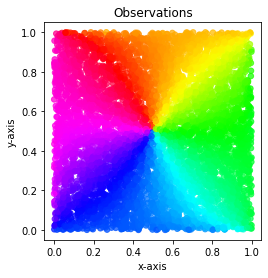

In [10]:
scatterplot_variables(X, 'Observations', colors=colors)

In [11]:
Jf, Jg = jacfwd(f), jacfwd(g)
Jf_batched, Jg_batched = vmap(Jf), vmap(Jg)

In [12]:
aDM(Jf_batched, S)

DeviceArray(0.26015806, dtype=float32)

Thank god it is bigger than zero.

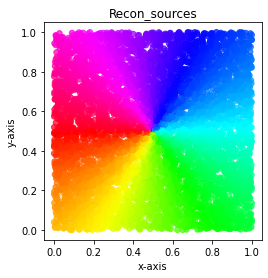

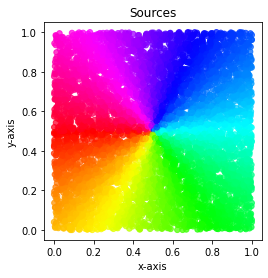

In [13]:
g_batched = vmap(g)
Y = g_batched(X)
scatterplot_variables(Y, 'Recon_sources', colors=colors)
scatterplot_variables(S, 'Sources', colors=colors)